# Project 

## Preprocessing

### Upload data 

In [125]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

filePath = r"E:\DataMining\Breast_Cancer\Breast_Cancer_Uncleaned-1.csv"
df = pd.read_csv(filePath)
df
ndf = df 

In [126]:
ndf.describe()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,3851,3817,3830,3813,3800,3803,3811,3814,3834,3818,3831,3805,3807,3817,3798,4024
unique,44,18,30,16,12,20,24,8,12,110,12,12,56,42,110,2
top,missing,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,25,Positive,Positive,missing,1,missing,Alive
freq,217,1142,854,847,1275,620,761,2231,1231,233,1217,1087,216,1286,226,3408


In [127]:
ndf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3851 non-null   object
 1   Race                    3817 non-null   object
 2   Marital Status          3830 non-null   object
 3   T Stage                 3813 non-null   object
 4   N Stage                 3800 non-null   object
 5   6th Stage               3803 non-null   object
 6   differentiate           3811 non-null   object
 7   Grade                   3814 non-null   object
 8   A Stage                 3834 non-null   object
 9   Tumor Size              3818 non-null   object
 10  Estrogen Status         3831 non-null   object
 11  Progesterone Status     3805 non-null   object
 12  Regional Node Examined  3807 non-null   object
 13  Reginol Node Positive   3817 non-null   object
 14  Survival Months         3798 non-null   object
 15  Stat

In [128]:
missing_data = ndf.isnull().sum()
missing_data

Age                       173
Race                      207
Marital Status            194
T Stage                   211
N Stage                   224
6th Stage                 221
differentiate             213
Grade                     210
A Stage                   190
Tumor Size                206
Estrogen Status           193
Progesterone Status       219
Regional Node Examined    217
Reginol Node Positive     207
Survival Months           226
Status                      0
dtype: int64

#### Age 

In [129]:
ndf['Age'] = pd.to_numeric(ndf['Age'], errors='coerce')
ndf['Age']

0       68.0
1       50.0
2       58.0
3       58.0
4       47.0
        ... 
4019    62.0
4020    56.0
4021    68.0
4022    58.0
4023    46.0
Name: Age, Length: 4024, dtype: float64

In [130]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3449 non-null   float64
 1   Race                    3817 non-null   object 
 2   Marital Status          3830 non-null   object 
 3   T Stage                 3813 non-null   object 
 4   N Stage                 3800 non-null   object 
 5   6th Stage               3803 non-null   object 
 6   differentiate           3811 non-null   object 
 7   Grade                   3814 non-null   object 
 8   A Stage                 3834 non-null   object 
 9   Tumor Size              3818 non-null   object 
 10  Estrogen Status         3831 non-null   object 
 11  Progesterone Status     3805 non-null   object 
 12  Regional Node Examined  3807 non-null   object 
 13  Reginol Node Positive   3817 non-null   object 
 14  Survival Months         3798 non-null   

In [131]:
missing_data = ndf['Age'].isnull().sum()
missing_data

np.int64(575)

In [132]:
df['Age'].unique()

array([68., 50., 58., 47., 51., 40., 69., nan, 65., 56., 43., 48., 57.,
       55., 62., 63., 46., 66., 53., 59., 60., 54., 49., 64., 42., 37.,
       67., 31., 52., 33., 45., 61., 39., 38., 36., 44., 41., 32., 34.,
       30., 35.])

In [133]:
mean_age = ndf['Age'].mean()
mode_age = ndf['Age'].mode()[0]
median_age = ndf['Age'].median()

# Print the results
print(f"Mean Age: {mean_age}")
print(f"Mode Age: {mode_age}")
print(f"Median Age: {median_age}")


Mean Age: 53.929834734705715
Mode Age: 47.0
Median Age: 54.0


In [134]:
# Fill missing values in Age with the median
ndf['Age'].fillna(ndf['Age'].median(), inplace=True)


In [135]:
ndf['Age'].isnull().sum()

np.int64(0)

#### Race

In [136]:
ndf['Race'].unique()

array(['White', ' white ', 'WHITE', nan, 'white', ' WHITE ', ' Black ',
       ' other ', 'other', ' Other ', 'Other', 'black', ' White ',
       ' black ', ' OTHER ', 'Black', 'OTHER', ' BLACK ', 'BLACK'],
      dtype=object)

In [137]:
ndf['Race'] = ndf['Race'].str.strip().str.lower()

ndf['Race'] = ndf['Race'].replace({
    'white': 'White', 
    'black': 'Black', 
    'other': 'Other'
})

ndf['Race'].unique()


array(['White', nan, 'Black', 'Other'], dtype=object)

In [138]:
race_frequency = ndf['Race'].value_counts(dropna=False)

print(race_frequency)


Race
White    3241
Other     302
Black     274
NaN       207
Name: count, dtype: int64


In [139]:
most_frequent_race = ndf['Race'].mode()[0] 
ndf['Race'].fillna(most_frequent_race, inplace=True)


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\1498493891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Race'].fillna(most_frequent_race, inplace=True)


In [140]:
ndf['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [141]:
# Perform one-hot encoding on the 'Race' column
ndf = pd.get_dummies(ndf, columns=['Race'], drop_first=False)

ndf.head()

,Age,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White
0,68.0,Married,T1,N1,iia,Poorly differentiated,3,REGIONAL,missing,positive,positive,24,1,MISSING,Alive,False,False,True
1,50.0,married,t2,N2,IIIA,Moderately differentiated,2,Regional,35,positive,Positive,14,NaN,62,Alive,False,False,True
2,58.0,Divorced,T3,N3,IIIC,Moderately differentiated,2,REGIONAL,63,Positive,NaN,14,NaN,75,Alive,False,False,True
3,58.0,married,T1,N1,IIA,Poorly differentiated,NaN,Regional,18,positive,POSITIVE,2,1,84,Alive,False,False,True
4,47.0,MARRIED,t2,N1,IIB,POORLY DIFFERENTIATED,3,regional,missing,Positive,POSITIVE,MISSING,1,50,Alive,False,False,True


In [142]:
ndf['Race_White'] = ndf['Race_White'].astype(int)
ndf['Race_Black'] = ndf['Race_Black'].astype(int)
ndf['Race_Other'] = ndf['Race_Other'].astype(int)

ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   float64
 1   Marital Status          3830 non-null   object 
 2   T Stage                 3813 non-null   object 
 3   N Stage                 3800 non-null   object 
 4   6th Stage               3803 non-null   object 
 5   differentiate           3811 non-null   object 
 6   Grade                   3814 non-null   object 
 7   A Stage                 3834 non-null   object 
 8   Tumor Size              3818 non-null   object 
 9   Estrogen Status         3831 non-null   object 
 10  Progesterone Status     3805 non-null   object 
 11  Regional Node Examined  3807 non-null   object 
 12  Reginol Node Positive   3817 non-null   object 
 13  Survival Months         3798 non-null   object 
 14  Status                  4024 non-null   

#### Marital Status

In [143]:
ndf['Marital Status'].unique()

array(['Married', 'married', ' Divorced ', 'MARRIED', nan, 'widowed',
       ' MARRIED ', 'Divorced', ' married ', ' Single ', ' DIVORCED ',
       ' Married ', ' SINGLE ', 'DIVORCED', 'separated', 'single',
       'Widowed', 'Single', ' Widowed ', ' single ', 'SINGLE',
       ' WIDOWED ', 'divorced', 'WIDOWED', ' divorced ', 'SEPARATED',
       ' separated ', ' widowed ', 'Separated', ' Separated ',
       ' SEPARATED '], dtype=object)

In [144]:
ndf['Marital Status'] = ndf['Marital Status'].str.strip().str.lower()

ndf['Marital Status'] = ndf['Marital Status'].replace({
    'married': 'married',
    'marrried': 'married',
    'single': 'single',
    'widowed': 'widowed',
    'divorced': 'divorced',
    'separated': 'separated'
})
ndf['Marital Status'].unique()


array(['married', 'divorced', nan, 'widowed', 'single', 'separated'],
      dtype=object)

In [145]:
Marital_Status_frequency = ndf['Marital Status'].value_counts(dropna=False)

Marital_Status_frequency

Marital Status
married      2504
single        591
divorced      464
widowed       228
NaN           194
separated      43
Name: count, dtype: int64

In [146]:
most_frequent_value = ndf['Marital Status'].mode()[0]
ndf['Marital Status'].fillna(most_frequent_value, inplace=True)


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\3432635002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Marital Status'].fillna(most_frequent_value, inplace=True)


In [147]:
Marital_Status_frequency = ndf['Marital Status'].value_counts(dropna=False)

Marital_Status_frequency

Marital Status
married      2698
single        591
divorced      464
widowed       228
separated      43
Name: count, dtype: int64

In [148]:
ndf = pd.get_dummies(ndf, columns=['Marital Status'], drop_first=False)

ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   float64
 1   T Stage                   3813 non-null   object 
 2   N Stage                   3800 non-null   object 
 3   6th Stage                 3803 non-null   object 
 4   differentiate             3811 non-null   object 
 5   Grade                     3814 non-null   object 
 6   A Stage                   3834 non-null   object 
 7   Tumor Size                3818 non-null   object 
 8   Estrogen Status           3831 non-null   object 
 9   Progesterone Status       3805 non-null   object 
 10  Regional Node Examined    3807 non-null   object 
 11  Reginol Node Positive     3817 non-null   object 
 12  Survival Months           3798 non-null   object 
 13  Status                    4024 non-null   object 
 14  Race_Bla

In [149]:
ndf['Marital Status_widowed'] = ndf['Marital Status_widowed'].astype(int)
ndf['Marital Status_single'] = ndf['Marital Status_single'].astype(int)
ndf['Marital Status_married'] = ndf['Marital Status_married'].astype(int)
ndf['Marital Status_separated'] = ndf['Marital Status_separated'].astype(int)
ndf['Marital Status_divorced'] = ndf['Marital Status_divorced'].astype(int)


ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   float64
 1   T Stage                   3813 non-null   object 
 2   N Stage                   3800 non-null   object 
 3   6th Stage                 3803 non-null   object 
 4   differentiate             3811 non-null   object 
 5   Grade                     3814 non-null   object 
 6   A Stage                   3834 non-null   object 
 7   Tumor Size                3818 non-null   object 
 8   Estrogen Status           3831 non-null   object 
 9   Progesterone Status       3805 non-null   object 
 10  Regional Node Examined    3807 non-null   object 
 11  Reginol Node Positive     3817 non-null   object 
 12  Survival Months           3798 non-null   object 
 13  Status                    4024 non-null   object 
 14  Race_Bla

In [150]:
ndf.shape

(4024, 22)

#### Edit Columns

In [151]:
ndf.columns = ndf.columns.str.replace(' ', '_')

# Display the updated column names
print(ndf.columns)


Index(['Age', 'T_Stage_', 'N_Stage', '6th_Stage', 'differentiate', 'Grade',
       'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months',
       'Status', 'Race_Black', 'Race_Other', 'Race_White',
       'Marital_Status_divorced', 'Marital_Status_married',
       'Marital_Status_separated', 'Marital_Status_single',
       'Marital_Status_widowed'],
      dtype='object')


#### Adjusted AJCC 6th T


In [152]:
ndf['T_Stage_'] = ndf['T_Stage_'].str.strip().str.upper()

ndf['T_Stage_'].unique()

array(['T1', 'T2', 'T3', nan, 'T4'], dtype=object)

In [153]:
T_Stage_frequency = ndf['T_Stage_'].value_counts(dropna=False)

T_Stage_frequency

T_Stage_
T2     1702
T1     1516
T3      500
NaN     211
T4       95
Name: count, dtype: int64

In [154]:
ndf['T_Stage_'].fillna('T2', inplace=True)


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\668313778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['T_Stage_'].fillna('T2', inplace=True)


In [155]:
T_Stage_frequency = ndf['T_Stage_'].value_counts(dropna=False)

T_Stage_frequency

T_Stage_
T2    1913
T1    1516
T3     500
T4      95
Name: count, dtype: int64

In [156]:
ndf['T_Stage_'] = ndf['T_Stage_'].replace({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4})

ndf['T_Stage_'].unique()


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\2357429313.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndf['T_Stage_'] = ndf['T_Stage_'].replace({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4})


array([1, 2, 3, 4])

In [157]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   float64
 1   T_Stage_                  4024 non-null   int64  
 2   N_Stage                   3800 non-null   object 
 3   6th_Stage                 3803 non-null   object 
 4   differentiate             3811 non-null   object 
 5   Grade                     3814 non-null   object 
 6   A_Stage                   3834 non-null   object 
 7   Tumor_Size                3818 non-null   object 
 8   Estrogen_Status           3831 non-null   object 
 9   Progesterone_Status       3805 non-null   object 
 10  Regional_Node_Examined    3807 non-null   object 
 11  Reginol_Node_Positive     3817 non-null   object 
 12  Survival_Months           3798 non-null   object 
 13  Status                    4024 non-null   object 
 14  Race_Bla

#### N Stage 

In [158]:
ndf['N_Stage'].unique()


array(['N1', 'N2', ' N3 ', ' N1 ', ' n1 ', nan, 'N3', 'n1', ' n3 ', 'n3',
       'n2', ' N2 ', ' n2 '], dtype=object)

In [159]:
ndf['N_Stage'] = ndf['N_Stage'].str.strip().str.upper()

ndf['N_Stage'].unique()

array(['N1', 'N2', 'N3', nan], dtype=object)

In [160]:
N_Stage_frequency = ndf['N_Stage'].value_counts(dropna=False)

N_Stage_frequency

N_Stage
N1     2574
N2      787
N3      439
NaN     224
Name: count, dtype: int64

In [161]:
ndf['N_Stage'].fillna('N1', inplace=True)


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\750662734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['N_Stage'].fillna('N1', inplace=True)


In [162]:
N_Stage_frequency = ndf['N_Stage'].value_counts(dropna=False)

N_Stage_frequency

N_Stage
N1    2798
N2     787
N3     439
Name: count, dtype: int64

In [163]:
ndf['N_Stage'] = ndf['N_Stage'].replace({'N1': 1, 'N2': 2, 'N3': 3})

ndf['N_Stage'].unique()


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\4016260961.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndf['N_Stage'] = ndf['N_Stage'].replace({'N1': 1, 'N2': 2, 'N3': 3})


array([1, 2, 3])

In [164]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   float64
 1   T_Stage_                  4024 non-null   int64  
 2   N_Stage                   4024 non-null   int64  
 3   6th_Stage                 3803 non-null   object 
 4   differentiate             3811 non-null   object 
 5   Grade                     3814 non-null   object 
 6   A_Stage                   3834 non-null   object 
 7   Tumor_Size                3818 non-null   object 
 8   Estrogen_Status           3831 non-null   object 
 9   Progesterone_Status       3805 non-null   object 
 10  Regional_Node_Examined    3807 non-null   object 
 11  Reginol_Node_Positive     3817 non-null   object 
 12  Survival_Months           3798 non-null   object 
 13  Status                    4024 non-null   object 
 14  Race_Bla

#### 6th Stage
##### Breast Adjusted AJCC 6th Stage

In [165]:
ndf['6th_Stage'].unique()

array(['iia', 'IIIA', ' IIIC ', ' IIA ', 'IIB', 'IIA', nan, 'IIIC',
       'iiia', ' iib ', 'iib', 'iiic', ' IIIA ', ' iiic ', ' IIB ',
       ' iiia ', ' iia ', ' IIIB ', 'IIIB', 'iiib', ' iiib '],
      dtype=object)

In [166]:
ndf['6th_Stage'] = ndf['6th_Stage'].str.strip().str.upper()

ndf['6th_Stage'] = ndf['6th_Stage'].replace({
    'IIA': 'IIA', 'IIIB': 'IIIB', 'IIIA': 'IIIA', 'IIB': 'IIB',
    'III': 'IIIC', 'IIIC': 'IIIC'
})

print(ndf['6th_Stage'].unique())


['IIA' 'IIIA' 'IIIC' 'IIB' nan 'IIIB']


In [167]:
_6th_Stage_frequency = ndf['6th_Stage'].value_counts(dropna=False)

_6th_Stage_frequency

6th_Stage
IIA     1245
IIB     1055
IIIA     994
IIIC     448
NaN      221
IIIB      61
Name: count, dtype: int64

In [168]:
ndf['6th_Stage'].fillna('IIA', inplace=True)
_6th_Stage_frequency = ndf['6th_Stage'].value_counts(dropna=False)

_6th_Stage_frequency

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\3873962072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['6th_Stage'].fillna('IIA', inplace=True)


6th_Stage
IIA     1466
IIB     1055
IIIA     994
IIIC     448
IIIB      61
Name: count, dtype: int64

In [169]:
stage_mapping = {
    'IIA': 1,
    'IIB': 2,
    'IIIA': 3,
    'IIIC': 4,
    'IIIB': 5
}

ndf['6th_Stage'] = ndf['6th_Stage'].replace(stage_mapping)

ndf['6th_Stage']

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\3016239562.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndf['6th_Stage'] = ndf['6th_Stage'].replace(stage_mapping)


0       1
1       3
2       4
3       1
4       2
       ..
4019    1
4020    3
4021    2
4022    2
4023    2
Name: 6th_Stage, Length: 4024, dtype: int64

In [170]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   float64
 1   T_Stage_                  4024 non-null   int64  
 2   N_Stage                   4024 non-null   int64  
 3   6th_Stage                 4024 non-null   int64  
 4   differentiate             3811 non-null   object 
 5   Grade                     3814 non-null   object 
 6   A_Stage                   3834 non-null   object 
 7   Tumor_Size                3818 non-null   object 
 8   Estrogen_Status           3831 non-null   object 
 9   Progesterone_Status       3805 non-null   object 
 10  Regional_Node_Examined    3807 non-null   object 
 11  Reginol_Node_Positive     3817 non-null   object 
 12  Survival_Months           3798 non-null   object 
 13  Status                    4024 non-null   object 
 14  Race_Bla

#### Differentiate


In [171]:
ndf['differentiate'].unique()

array(['Poorly differentiated', ' Moderately differentiated ',
       'Moderately differentiated', 'POORLY DIFFERENTIATED', nan,
       'well differentiated', 'Well differentiated',
       ' MODERATELY DIFFERENTIATED ', ' poorly differentiated ',
       'moderately differentiated', 'MODERATELY DIFFERENTIATED',
       ' Poorly differentiated ', ' moderately differentiated ',
       ' POORLY DIFFERENTIATED ', ' WELL DIFFERENTIATED ',
       'poorly differentiated', ' well differentiated ',
       'WELL DIFFERENTIATED', ' Well differentiated ', 'undifferentiated',
       ' undifferentiated ', ' Undifferentiated ', 'Undifferentiated',
       ' UNDIFFERENTIATED ', 'UNDIFFERENTIATED'], dtype=object)

In [172]:
ndf['differentiate'] = ndf['differentiate'].str.strip().str.upper()

ndf['differentiate'] = ndf['differentiate'].replace({
    'POORLY DIFFERENTIATED': 'POORLY DIFFERENTIATED',
    'MODERATELY DIFFERENTIATED': 'MODERATELY DIFFERENTIATED',
    'WELL DIFFERENTIATED': 'WELL DIFFERENTIATED',
    'UNDIFFERENTIATED': 'UNDIFFERENTIATED'
})

print(ndf['differentiate'].unique())


['POORLY DIFFERENTIATED' 'MODERATELY DIFFERENTIATED' nan
 'WELL DIFFERENTIATED' 'UNDIFFERENTIATED']


- POORLY DIFFERENTIATED:
-- The cancer cells are very different from normal cells.
-- This typically indicates a more aggressive and rapidly growing tumor.

- MODERATELY DIFFERENTIATED:

-- The cancer cells have some similarity to normal cells, but not a lot.
-- This suggests that the tumor is somewhat aggressive, though not as much as poorly differentiated tumors.

- WELL DIFFERENTIATED:

-- The cancer cells closely resemble normal cells.
-- This suggests the tumor is less aggressive and tends to grow more slowly.

- UNDIFFERENTIATED:

The cancer cells are unrecognizable compared to normal cells.
This generally indicates a highly aggressive and fast-growing tumor.

In [173]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   float64
 1   T_Stage_                  4024 non-null   int64  
 2   N_Stage                   4024 non-null   int64  
 3   6th_Stage                 4024 non-null   int64  
 4   differentiate             3811 non-null   object 
 5   Grade                     3814 non-null   object 
 6   A_Stage                   3834 non-null   object 
 7   Tumor_Size                3818 non-null   object 
 8   Estrogen_Status           3831 non-null   object 
 9   Progesterone_Status       3805 non-null   object 
 10  Regional_Node_Examined    3807 non-null   object 
 11  Reginol_Node_Positive     3817 non-null   object 
 12  Survival_Months           3798 non-null   object 
 13  Status                    4024 non-null   object 
 14  Race_Bla

In [174]:
most_frequent_differentiate = ndf['differentiate'].mode()[0]

ndf['differentiate'].fillna(most_frequent_differentiate, inplace=True)

print(ndf['differentiate'].unique())


['POORLY DIFFERENTIATED' 'MODERATELY DIFFERENTIATED' 'WELL DIFFERENTIATED'
 'UNDIFFERENTIATED']


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\2955897330.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['differentiate'].fillna(most_frequent_differentiate, inplace=True)


In [175]:
ndf['differentiate']

0           POORLY DIFFERENTIATED
1       MODERATELY DIFFERENTIATED
2       MODERATELY DIFFERENTIATED
3           POORLY DIFFERENTIATED
4           POORLY DIFFERENTIATED
                  ...            
4019    MODERATELY DIFFERENTIATED
4020    MODERATELY DIFFERENTIATED
4021    MODERATELY DIFFERENTIATED
4022    MODERATELY DIFFERENTIATED
4023    MODERATELY DIFFERENTIATED
Name: differentiate, Length: 4024, dtype: object

In [176]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   float64
 1   T_Stage_                  4024 non-null   int64  
 2   N_Stage                   4024 non-null   int64  
 3   6th_Stage                 4024 non-null   int64  
 4   differentiate             4024 non-null   object 
 5   Grade                     3814 non-null   object 
 6   A_Stage                   3834 non-null   object 
 7   Tumor_Size                3818 non-null   object 
 8   Estrogen_Status           3831 non-null   object 
 9   Progesterone_Status       3805 non-null   object 
 10  Regional_Node_Examined    3807 non-null   object 
 11  Reginol_Node_Positive     3817 non-null   object 
 12  Survival_Months           3798 non-null   object 
 13  Status                    4024 non-null   object 
 14  Race_Bla

In [177]:
ndf = pd.get_dummies(ndf, columns=['differentiate'], drop_first=True)

ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                3814 non-null   object 
 5   A_Stage                              3834 non-null   object 
 6   Tumor_Size                           3818 non-null   object 
 7   Estrogen_Status                      3831 non-null   object 
 8   Progesterone_Status                  3805 non-null   object 
 9   Regional_Node_Examined               3807 non-null   object 
 10  Reginol_Node_Positive                3817 non-null   object 
 11  Survival_Months               

In [178]:
ndf['differentiate_POORLY DIFFERENTIATED'] = ndf['differentiate_POORLY DIFFERENTIATED'].astype(int)
ndf['differentiate_UNDIFFERENTIATED'] = ndf['differentiate_UNDIFFERENTIATED'].astype(int)
ndf['differentiate_WELL DIFFERENTIATED'] = ndf['differentiate_WELL DIFFERENTIATED'].astype(int)

ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                3814 non-null   object 
 5   A_Stage                              3834 non-null   object 
 6   Tumor_Size                           3818 non-null   object 
 7   Estrogen_Status                      3831 non-null   object 
 8   Progesterone_Status                  3805 non-null   object 
 9   Regional_Node_Examined               3807 non-null   object 
 10  Reginol_Node_Positive                3817 non-null   object 
 11  Survival_Months               

#### Grade
##### The grade

In [179]:
ndf['Grade'].unique()

array(['3', '2', nan, '1', ' anaplastic; grade iv ',
       'anaplastic; grade iv', ' anaplastic; Grade IV ',
       'anaplastic; Grade IV', ' ANAPLASTIC; GRADE IV '], dtype=object)

In [180]:
ndf['Grade'] = ndf['Grade'].str.strip().str.upper()

ndf['Grade'] = ndf['Grade'].replace({
    'ANAPLASTIC; GRADE IV': 'ANAPLASTIC GRADE IV',
    'ANAPLASTIC GRADE IV': 'ANAPLASTIC GRADE IV'
})

most_frequent_grade = ndf['Grade'].mode()[0]
most_frequent_grade

print(ndf['Grade'].unique())

most_frequent_grade


['3' '2' nan '1' 'ANAPLASTIC GRADE IV']


'2'

In [181]:
ndf['Grade'].fillna(most_frequent_grade, inplace=True)

print(ndf['Grade'].unique())

['3' '2' '1' 'ANAPLASTIC GRADE IV']


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\3785702972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Grade'].fillna(most_frequent_grade, inplace=True)


In [182]:
ndf['Grade'] = ndf['Grade'].replace('ANAPLASTIC GRADE IV', 4)

print(ndf['Grade'].unique())


['3' '2' '1' 4]


In [183]:
ndf['Grade'] = pd.to_numeric(ndf['Grade'], errors='coerce')

most_frequent_grade = ndf['Grade'].mode()[0]

most_frequent_grade

np.int64(2)

In [184]:
ndf['Grade'].unique()

array([3, 2, 1, 4])

In [185]:
ndf['Grade'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4024 entries, 0 to 4023
Series name: Grade
Non-Null Count  Dtype
--------------  -----
4024 non-null   int64
dtypes: int64(1)
memory usage: 31.6 KB


#### A Stage
##### Regional — A neoplasm that has extended, Distant — A neoplasm that has spread to parts of the body remote from

In [186]:
ndf['A_Stage'] = ndf['A_Stage'].str.strip().str.upper()

ndf['A_Stage'] = ndf['A_Stage'].replace({
    'REGIONAL': 'REGIONAL',
    'DISTANT': 'DISTANT'
})

print(ndf['A_Stage'].unique())


['REGIONAL' 'DISTANT' nan]


In [187]:
A_Stage_frequency = ndf['A_Stage'].value_counts(dropna=False)

A_Stage_frequency


A_Stage
REGIONAL    3748
NaN          190
DISTANT       86
Name: count, dtype: int64

In [188]:
ndf['A_Stage'].fillna(A_Stage_frequency, inplace=True)

# Display the unique values after replacement
print(ndf['A_Stage'].unique())

['REGIONAL' 'DISTANT' nan]


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\479882919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['A_Stage'].fillna(A_Stage_frequency, inplace=True)


In [189]:
print(ndf['A_Stage'].unique())

['REGIONAL' 'DISTANT' nan]


In [190]:
most_frequent_A_Stage = A_Stage_frequency.idxmax()

ndf['A_Stage'].fillna(most_frequent_A_Stage, inplace=True)

print(ndf['A_Stage'].unique())


['REGIONAL' 'DISTANT']


In [191]:
ndf = pd.get_dummies(ndf, columns=['A_Stage'], drop_first=False)

print(ndf.head())


    Age  T_Stage_  N_Stage  6th_Stage  Grade Tumor_Size Estrogen_Status  \
0  68.0         1        1          1      3    missing       positive    
1  50.0         2        2          3      2         35       positive    
2  58.0         3        3          4      2         63       Positive    
3  58.0         1        1          1      2         18        positive   
4  47.0         2        1          2      3    missing        Positive   

  Progesterone_Status Regional_Node_Examined Reginol_Node_Positive  ...  \
0           positive                      24                     1  ...   
1           Positive                      14                   NaN  ...   
2                 NaN                     14                   NaN  ...   
3            POSITIVE                      2                     1  ...   
4           POSITIVE                 MISSING                     1  ...   

  Marital_Status_divorced Marital_Status_married  Marital_Status_separated  \
0                   

In [192]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           3818 non-null   object 
 6   Estrogen_Status                      3831 non-null   object 
 7   Progesterone_Status                  3805 non-null   object 
 8   Regional_Node_Examined               3807 non-null   object 
 9   Reginol_Node_Positive                3817 non-null   object 
 10  Survival_Months                      3798 non-null   object 
 11  Status                        

In [193]:
ndf['A_Stage_DISTANT'] = ndf['A_Stage_DISTANT'].astype(int)
ndf['A_Stage_REGIONAL'] = ndf['A_Stage_REGIONAL'].astype(int)

ndf[['A_Stage_DISTANT', 'A_Stage_REGIONAL']]


,A_Stage_DISTANT,A_Stage_REGIONAL
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4019,0,1
4020,0,1
4021,0,1
4022,0,1


In [194]:
ndf['A_Stage_DISTANT'] = ndf['A_Stage_DISTANT'].astype(int)
ndf['A_Stage_REGIONAL'] = ndf['A_Stage_REGIONAL'].astype(int)

ndf[['A_Stage_DISTANT', 'A_Stage_REGIONAL']]


,A_Stage_DISTANT,A_Stage_REGIONAL
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4019,0,1
4020,0,1
4021,0,1
4022,0,1


In [195]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           3818 non-null   object 
 6   Estrogen_Status                      3831 non-null   object 
 7   Progesterone_Status                  3805 non-null   object 
 8   Regional_Node_Examined               3807 non-null   object 
 9   Reginol_Node_Positive                3817 non-null   object 
 10  Survival_Months                      3798 non-null   object 
 11  Status                        

#### Tumor Size
##### Each indicates exact size in millimeters.

In [196]:
ndf['Tumor_Size'].unique()

array(['missing', '35', '63', '18', '20', '8', '30', '103', '32', '13',
       '59', '15', '19', '46', ' MISSING ', '25', '29', '40', '70', '22',
       '17', '21', '10', '27', '23', '5', '51', nan, ' missing ', '55',
       '120', '77', '11', '12', '26', '75', '130', '34', '50', '80', '3',
       '60', '14', '24', '16', '45', '76', 'MISSING', '38', '49', '7',
       '4', '72', '9', '100', '43', '62', '37', '68', '52', '85', '57',
       '39', '28', '48', '110', '65', '105', '140', '31', '90', '2',
       '108', '98', '47', '42', '54', '61', '6', '36', '74', '33', '1',
       '81', '58', '117', '44', '123', '95', '107', '92', '69', '56',
       '82', '41', '78', '97', '88', '53', '101', '84', '83', '73', '66',
       '104', '94', '86', '64', '96', '79', '67'], dtype=object)

In [197]:
ndf['Tumor_Size'].isnull().sum()

np.int64(206)

In [198]:
ndf['Tumor_Size'] = ndf['Tumor_Size'].replace(['missing', ' MISSING ', ' missing ', 'MISSING', 'nan', ' missing'], np.nan)

ndf['Tumor_Size'] = pd.to_numeric(ndf['Tumor_Size'], errors='coerce')

ndf[['Tumor_Size']].head()


,Tumor_Size
0,NaN
1,35.0
2,63.0
3,18.0
4,NaN


In [199]:
mean_tumor_size = ndf['Tumor_Size'].mean()
mode_tumor_size = ndf['Tumor_Size'].mode()[0]  # mode() returns a series, so we take the first element
median_tumor_size = ndf['Tumor_Size'].median()

print(f"Mean Tumor Size: {mean_tumor_size}")
print(f"Mode Tumor Size: {mode_tumor_size}")
print(f"Median Tumor Size: {median_tumor_size}")


Mean Tumor Size: 30.386655011655012
Mode Tumor Size: 25.0
Median Tumor Size: 25.0


In [200]:
ndf['Tumor_Size'].fillna(median_tumor_size, inplace=True)

ndf[['Tumor_Size']]

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\2721835256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Tumor_Size'].fillna(median_tumor_size, inplace=True)


,Tumor_Size
0,25.0
1,35.0
2,63.0
3,18.0
4,25.0
...,...
4019,9.0
4020,46.0
4021,22.0
4022,44.0


In [201]:
ndf['Tumor_Size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4024 entries, 0 to 4023
Series name: Tumor_Size
Non-Null Count  Dtype  
--------------  -----  
4024 non-null   float64
dtypes: float64(1)
memory usage: 31.6 KB


#### Estrogen Status


In [202]:
ndf['Estrogen_Status'].unique()

array([' positive ', ' Positive ', 'positive', 'Positive', 'POSITIVE',
       ' POSITIVE ', 'negative', 'Negative', nan, ' NEGATIVE ',
       'NEGATIVE', ' Negative ', ' negative '], dtype=object)

In [203]:
ndf['Estrogen_Status'] = ndf['Estrogen_Status'].str.strip().str.upper()

ndf['Estrogen_Status'].unique()

array(['POSITIVE', 'NEGATIVE', nan], dtype=object)

In [204]:
Estrogen_Status_frequency = ndf['Estrogen_Status'].value_counts(dropna=False)

Estrogen_Status_frequency

Estrogen_Status
POSITIVE    3574
NEGATIVE     257
NaN          193
Name: count, dtype: int64

In [205]:
ndf['Estrogen_Status'].fillna('POSITIVE', inplace=True)
Estrogen_Status_frequency = ndf['Estrogen_Status'].value_counts(dropna=False)

Estrogen_Status_frequency

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\2449801190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Estrogen_Status'].fillna('POSITIVE', inplace=True)


Estrogen_Status
POSITIVE    3767
NEGATIVE     257
Name: count, dtype: int64

In [206]:
ndf['Estrogen_Status'] = ndf['Estrogen_Status'].replace({
    'NEGATIVE': 0,
    'POSITIVE': 1
    
})
ndf['Estrogen_Status'] = pd.to_numeric(ndf['Estrogen_Status'], errors='coerce')

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\160973338.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndf['Estrogen_Status'] = ndf['Estrogen_Status'].replace({


In [207]:
ndf['Estrogen_Status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4024 entries, 0 to 4023
Series name: Estrogen_Status
Non-Null Count  Dtype
--------------  -----
4024 non-null   int64
dtypes: int64(1)
memory usage: 31.6 KB


#### Progesterone_Status 


In [208]:
ndf['Progesterone_Status'].unique()


array([' positive ', ' Positive ', nan, 'POSITIVE', ' POSITIVE ',
       'positive', 'Positive', ' Negative ', 'Negative', 'negative',
       ' NEGATIVE ', ' negative ', 'NEGATIVE'], dtype=object)

In [209]:
ndf['Progesterone_Status'] = ndf['Progesterone_Status'].str.strip().str.upper()

ndf['Progesterone_Status'].unique()

array(['POSITIVE', nan, 'NEGATIVE'], dtype=object)

In [210]:
Progesterone_Status_frequency = ndf['Progesterone_Status'].value_counts(dropna=False)

Progesterone_Status_frequency

Progesterone_Status
POSITIVE    3141
NEGATIVE     664
NaN          219
Name: count, dtype: int64

In [211]:
ndf['Progesterone_Status'].fillna('POSITIVE', inplace=True)
Progesterone_Status_frequency = ndf['Progesterone_Status'].value_counts(dropna=False)

Progesterone_Status_frequency

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\1606662864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Progesterone_Status'].fillna('POSITIVE', inplace=True)


Progesterone_Status
POSITIVE    3360
NEGATIVE     664
Name: count, dtype: int64

In [212]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           4024 non-null   float64
 6   Estrogen_Status                      4024 non-null   int64  
 7   Progesterone_Status                  4024 non-null   object 
 8   Regional_Node_Examined               3807 non-null   object 
 9   Reginol_Node_Positive                3817 non-null   object 
 10  Survival_Months                      3798 non-null   object 
 11  Status                        

In [213]:
ndf['Progesterone_Status'] = ndf['Progesterone_Status'].replace({
    'NEGATIVE': 0,
    'POSITIVE': 1
    
})
ndf['Progesterone_Status'] = pd.to_numeric(ndf['Progesterone_Status'], errors='coerce')

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\1402822608.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndf['Progesterone_Status'] = ndf['Progesterone_Status'].replace({


In [214]:
ndf['Progesterone_Status'].info() 


<class 'pandas.core.series.Series'>
RangeIndex: 4024 entries, 0 to 4023
Series name: Progesterone_Status
Non-Null Count  Dtype
--------------  -----
4024 non-null   int64
dtypes: int64(1)
memory usage: 31.6 KB


#### Reginol Node Examined

In [215]:
ndf['Regional_Node_Examined'].unique()

array(['24', '14', '2', 'MISSING', '18', '11', '9', '20', '21', 'missing',
       '13', '23', '16', '22', ' missing ', '15', '4', '26', '31', '25',
       '10', '3', '5', '6', '19', '12', nan, '8', '17', '7', '49', '1',
       '33', '30', '34', '28', '32', '27', '42', '29', ' MISSING ', '41',
       '39', '40', '38', '47', '54', '36', '61', '37', '35', '43', '52',
       '45', '57', '51', '60'], dtype=object)

In [216]:
ndf['Regional_Node_Examined'].isnull().sum()

np.int64(217)

In [217]:
ndf['Regional_Node_Examined'] = ndf['Regional_Node_Examined'].replace(['missing', ' MISSING ', ' missing ', 'MISSING', 'nan', ' missing'], np.nan)

ndf['Regional_Node_Examined'] = pd.to_numeric(ndf['Regional_Node_Examined'], errors='coerce')

ndf[['Regional_Node_Examined']].head()


,Regional_Node_Examined
0,24.0
1,14.0
2,14.0
3,2.0
4,NaN


In [218]:
ndf['Regional_Node_Examined'].unique()

array([24., 14.,  2., nan, 18., 11.,  9., 20., 21., 13., 23., 16., 22.,
       15.,  4., 26., 31., 25., 10.,  3.,  5.,  6., 19., 12.,  8., 17.,
        7., 49.,  1., 33., 30., 34., 28., 32., 27., 42., 29., 41., 39.,
       40., 38., 47., 54., 36., 61., 37., 35., 43., 52., 45., 57., 51.,
       60.])

In [219]:
mean_Regional_Node_Examined = ndf['Regional_Node_Examined'].mean()
mode_Regional_Node_Examined = ndf['Regional_Node_Examined'].mode()[0]  # mode() returns a series, so we take the first element
median_Regional_Node_Examined = ndf['Regional_Node_Examined'].median()

print(f"Mean = Size: {mean_Regional_Node_Examined}")
print(f"Mode  Size: {mode_Regional_Node_Examined}")
print(f"Median  Size: {median_Regional_Node_Examined}")


Mean = Size: 14.453376205787782
Mode  Size: 13.0
Median  Size: 14.0


In [220]:
ndf['Regional_Node_Examined'].fillna(median_Regional_Node_Examined, inplace=True)

ndf[['Regional_Node_Examined']]


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\706916573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Regional_Node_Examined'].fillna(median_Regional_Node_Examined, inplace=True)


,Regional_Node_Examined
0,24.0
1,14.0
2,14.0
3,2.0
4,14.0
...,...
4019,1.0
4020,14.0
4021,11.0
4022,11.0


In [221]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           4024 non-null   float64
 6   Estrogen_Status                      4024 non-null   int64  
 7   Progesterone_Status                  4024 non-null   int64  
 8   Regional_Node_Examined               4024 non-null   float64
 9   Reginol_Node_Positive                3817 non-null   object 
 10  Survival_Months                      3798 non-null   object 
 11  Status                        

#### Reginol_Node_Positive

In [222]:
ndf['Reginol_Node_Positive'].unique()

array(['1', nan, '2', 'MISSING', '18', '12', ' MISSING ', '3', '7', '14',
       ' missing ', 'missing', '22', '17', '23', '4', '6', '5', '9', '20',
       '16', '13', '11', '24', '10', '8', '27', '21', '26', '15', '19',
       '28', '31', '46', '33', '29', '37', '30', '35', '25', '32', '41',
       '34'], dtype=object)

In [223]:
ndf['Reginol_Node_Positive'].isnull().sum()

np.int64(207)

In [224]:
ndf['Reginol_Node_Positive'] = ndf['Reginol_Node_Positive'].replace(['missing', ' MISSING ', ' missing ', 'MISSING', 'nan', ' missing'], np.nan)

ndf['Reginol_Node_Positive'] = pd.to_numeric(ndf['Reginol_Node_Positive'], errors='coerce')

ndf[['Reginol_Node_Positive']].head()


,Reginol_Node_Positive
0,1.0
1,NaN
2,NaN
3,1.0
4,1.0


In [225]:
ndf['Reginol_Node_Positive'].isnull().sum()

np.int64(612)

In [226]:
ndf['Reginol_Node_Positive'].unique()

array([ 1., nan,  2., 18., 12.,  3.,  7., 14., 22., 17., 23.,  4.,  6.,
        5.,  9., 20., 16., 13., 11., 24., 10.,  8., 27., 21., 26., 15.,
       19., 28., 31., 46., 33., 29., 37., 30., 35., 25., 32., 41., 34.])

In [227]:
mean_Reginol_Node_Positive = ndf['Reginol_Node_Positive'].mean()
mode_Reginol_Node_Positive= ndf['Reginol_Node_Positive'].mode()[0]  # mode() returns a series, so we take the first element
median_Reginol_Node_Positive= ndf['Reginol_Node_Positive'].median()

print(f"Mean = Size: {mean_Reginol_Node_Positive}")
print(f"Mode  Size: {mode_Reginol_Node_Positive}")
print(f"Median  Size: {median_Reginol_Node_Positive}")


Mean = Size: 4.168815943728019
Mode  Size: 1.0
Median  Size: 2.0


In [228]:
ndf['Reginol_Node_Positive'].fillna(median_Reginol_Node_Positive, inplace=True)

ndf[['Reginol_Node_Positive']]


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\3900529205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Reginol_Node_Positive'].fillna(median_Reginol_Node_Positive, inplace=True)


,Reginol_Node_Positive
0,1.0
1,2.0
2,2.0
3,1.0
4,1.0
...,...
4019,1.0
4020,8.0
4021,3.0
4022,1.0


In [229]:
ndf['Reginol_Node_Positive'].unique()

array([ 1.,  2., 18., 12.,  3.,  7., 14., 22., 17., 23.,  4.,  6.,  5.,
        9., 20., 16., 13., 11., 24., 10.,  8., 27., 21., 26., 15., 19.,
       28., 31., 46., 33., 29., 37., 30., 35., 25., 32., 41., 34.])

In [230]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           4024 non-null   float64
 6   Estrogen_Status                      4024 non-null   int64  
 7   Progesterone_Status                  4024 non-null   int64  
 8   Regional_Node_Examined               4024 non-null   float64
 9   Reginol_Node_Positive                4024 non-null   float64
 10  Survival_Months                      3798 non-null   object 
 11  Status                        

#### Survival Months


In [231]:
ndf['Survival_Months'].unique()

array(['MISSING', '62', '75', '84', '50', '89', '54', '14', '70',
       ' missing ', '64', '92', '56', '38', '49', '105', '107', '77',
       'missing', '78', nan, '98', '102', '82', '86', '52', '90', '37',
       '103', ' MISSING ', '42', '63', '39', '59', '71', '74', '73', '91',
       '106', '60', '44', '85', '79', '104', '12', '95', '81', '55', '65',
       '72', '57', '40', '25', '8', '53', '58', '24', '66', '93', '94',
       '100', '87', '41', '67', '69', '101', '51', '13', '11', '47', '23',
       '45', '68', '15', '31', '76', '16', '99', '96', '7', '61', '48',
       '88', '97', '80', '83', '3', '22', '30', '6', '9', '5', '10', '19',
       '34', '18', '35', '27', '36', '4', '33', '26', '20', '28', '43',
       '17', '29', '21', '2', '46', '32'], dtype=object)

In [232]:
ndf['Survival_Months'].isnull().sum()

np.int64(226)

In [233]:
ndf['Survival_Months'] = ndf['Survival_Months'].replace(['missing', ' MISSING ', ' missing ', 'MISSING', 'nan', ' missing'], np.nan)

ndf['Survival_Months'] = pd.to_numeric(ndf['Survival_Months'], errors='coerce')

ndf[['Survival_Months']].head()


,Survival_Months
0,NaN
1,62.0
2,75.0
3,84.0
4,50.0


In [234]:
ndf['Survival_Months'].isnull().sum()

np.int64(625)

In [235]:
mean_Survival_Months = ndf['Survival_Months'].mean()
mode_Survival_Months= ndf['Survival_Months'].mode()[0]  
median_Survival_Months= ndf['Survival_Months'].median()

print(f"Mean = Size: {mean_Survival_Months}")
print(f"Mode  Size: {mode_Survival_Months}")
print(f"Median  Size: {median_Survival_Months}")

Mean = Size: 71.16475433951162
Mode  Size: 69.0
Median  Size: 73.0


In [236]:
ndf['Survival_Months'].fillna(median_Survival_Months, inplace=True)

ndf[['Survival_Months']]


C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\1043454301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndf['Survival_Months'].fillna(median_Survival_Months, inplace=True)


,Survival_Months
0,73.0
1,62.0
2,75.0
3,84.0
4,50.0
...,...
4019,49.0
4020,69.0
4021,69.0
4022,73.0


In [237]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           4024 non-null   float64
 6   Estrogen_Status                      4024 non-null   int64  
 7   Progesterone_Status                  4024 non-null   int64  
 8   Regional_Node_Examined               4024 non-null   float64
 9   Reginol_Node_Positive                4024 non-null   float64
 10  Survival_Months                      4024 non-null   float64
 11  Status                        

#### Status

In [238]:
ndf['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

In [239]:
ndf['Status'] = ndf['Status'].replace({
    'Dead': 0,
    'Alive': 1
    
})
ndf['Status'] = pd.to_numeric(ndf['Status'], errors='coerce')

C:\Users\Concept D\AppData\Local\Temp\ipykernel_25804\2711747122.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndf['Status'] = ndf['Status'].replace({


In [240]:
ndf['Status'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 4024 entries, 0 to 4023
Series name: Status
Non-Null Count  Dtype
--------------  -----
4024 non-null   int64
dtypes: int64(1)
memory usage: 31.6 KB


In [241]:
ndf.describe()

,Age,T_Stage_,N_Stage,6th_Stage,Grade,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,...,Marital_Status_divorced,Marital_Status_married,Marital_Status_separated,Marital_Status_single,Marital_Status_widowed,differentiate_POORLY DIFFERENTIATED,differentiate_UNDIFFERENTIATED,differentiate_WELL DIFFERENTIATED,A_Stage_DISTANT,A_Stage_REGIONAL
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,...,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.939861,1.794732,1.413767,2.150845,2.136431,29.594185,0.936133,0.834990,14.385437,3.838966,...,0.115308,0.670477,0.010686,0.146869,0.056660,0.257207,0.004722,0.128728,0.021372,0.978628
std,8.222385,0.743929,0.678874,1.081956,0.623131,19.521343,0.244546,0.371236,7.489444,4.770801,...,0.319433,0.470098,0.102832,0.354019,0.231221,0.437149,0.068561,0.334940,0.144638,0.144638
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.000000,1.000000,2.000000,18.000000,1.000000,1.000000,10.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,54.000000,2.000000,1.000000,2.000000,2.000000,25.000000,1.000000,1.000000,14.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,60.000000,2.000000,2.000000,3.000000,3.000000,35.000000,1.000000,1.000000,18.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,69.000000,4.000000,3.000000,5.000000,4.000000,140.000000,1.000000,1.000000,61.000000,46.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [242]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           4024 non-null   float64
 6   Estrogen_Status                      4024 non-null   int64  
 7   Progesterone_Status                  4024 non-null   int64  
 8   Regional_Node_Examined               4024 non-null   float64
 9   Reginol_Node_Positive                4024 non-null   float64
 10  Survival_Months                      4024 non-null   float64
 11  Status                        

In [243]:
#ndf.to_csv(r'E:\DataMining\Breast_Cancer\Breast_Cancer_cleaned.csv')

## Visualization 

- df  old dataframe 
- ndf new dataframe 

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          3830 non-null   object 
 3   T Stage                 3813 non-null   object 
 4   N Stage                 3800 non-null   object 
 5   6th Stage               3803 non-null   object 
 6   differentiate           3811 non-null   object 
 7   Grade                   3814 non-null   object 
 8   A Stage                 3834 non-null   object 
 9   Tumor Size              3818 non-null   object 
 10  Estrogen Status         3831 non-null   object 
 11  Progesterone Status     3805 non-null   object 
 12  Regional Node Examined  3807 non-null   object 
 13  Reginol Node Positive   3817 non-null   object 
 14  Survival Months         3798 non-null   

In [248]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4024 non-null   float64
 1   T_Stage_                             4024 non-null   int64  
 2   N_Stage                              4024 non-null   int64  
 3   6th_Stage                            4024 non-null   int64  
 4   Grade                                4024 non-null   int64  
 5   Tumor_Size                           4024 non-null   float64
 6   Estrogen_Status                      4024 non-null   int64  
 7   Progesterone_Status                  4024 non-null   int64  
 8   Regional_Node_Examined               4024 non-null   float64
 9   Reginol_Node_Positive                4024 non-null   float64
 10  Survival_Months                      4024 non-null   float64
 11  Status                        

### Age columns 

In [252]:
df['Age'].isnull().sum()
ndf['Age'].isnull().sum()

np.int64(0)

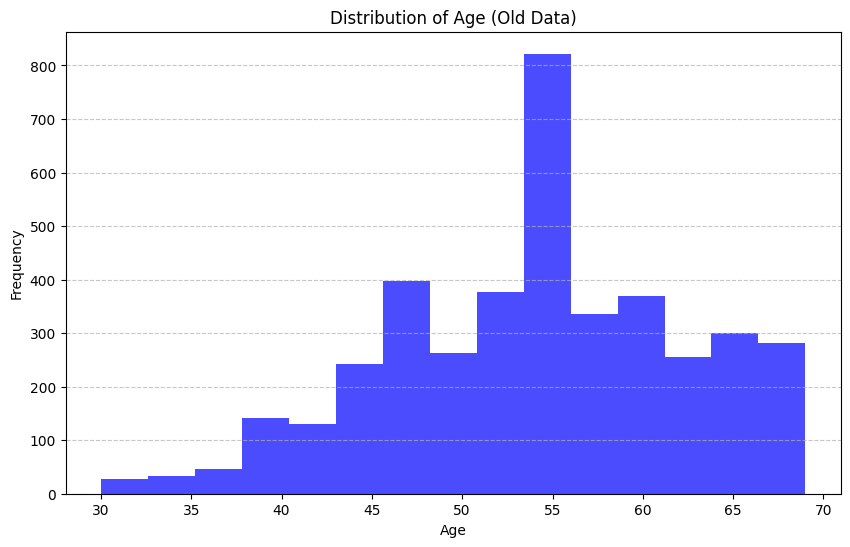

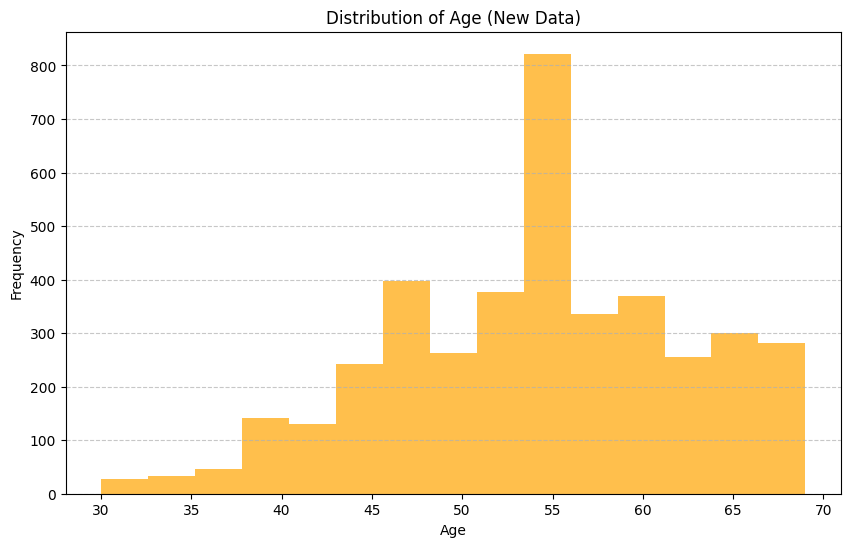

In [249]:
# Plot for "Age" column in df
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, color='blue', alpha=0.7)
plt.title('Distribution of Age (Old Data)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for "Age" column in ndf
plt.figure(figsize=(10, 6))
plt.hist(ndf['Age'], bins=15, color='orange', alpha=0.7)
plt.title('Distribution of Age (New Data)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Race Columns

In [255]:
print("Null values in Race column (df):", df['Race'].isnull().sum())
print("Null values in Race_Black column (ndf):", ndf['Race_Black'].isnull().sum())
print("Null values in Race_White column (ndf):", ndf['Race_White'].isnull().sum())
print("Null values in Race_Other column (ndf):", ndf['Race_Other'].isnull().sum())

Null values in Race column (df): 0
Null values in Race_Black column (ndf): 0
Null values in Race_White column (ndf): 0
Null values in Race_Other column (ndf): 0


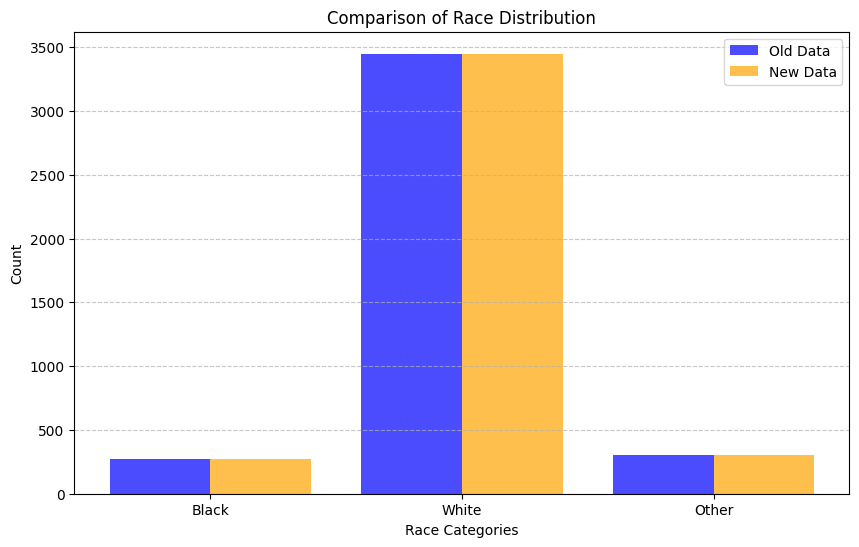

In [258]:
race_counts = df['Race'].value_counts()

# Summing dummy variables for race in ndf
black_count = ndf['Race_Black'].sum()
white_count = ndf['Race_White'].sum()
other_count = ndf['Race_Other'].sum()


# Plot comparison
categories = ['Black', 'White', 'Other']
old_data = [race_counts.get('Black', 0), race_counts.get('White', 0), race_counts.get('Other', 0)]
new_data = [black_count, white_count, other_count]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, old_data, width=0.4, label='Old Data', color='blue', alpha=0.7, align='center')
plt.bar([i + 0.4 for i in x], new_data, width=0.4, label='New Data', color='orange', alpha=0.7, align='center')
plt.title('Comparison of Race Distribution')
plt.xlabel('Race Categories')
plt.ylabel('Count')
plt.xticks([i + 0.2 for i in x], categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Marital Status

Null values in Marital Status column (df): 194
Null values in Marital_Status_divorced column (ndf): 0
Null values in Marital_Status_married column (ndf): 0
Null values in Marital_Status_separated column (ndf): 0
Null values in Marital_Status_single column (ndf): 0
Null values in Marital_Status_widowed column (ndf): 0


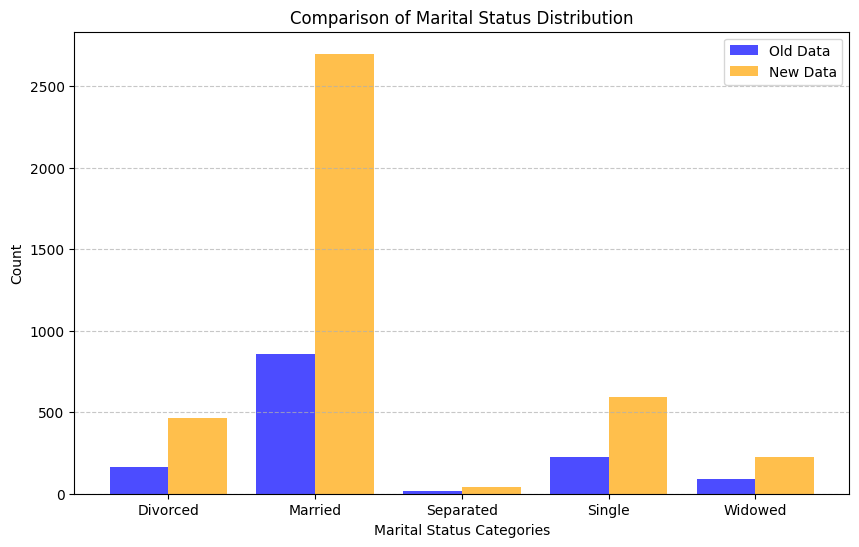

In [260]:
# Checking for null values in Marital Status-related columns
print("Null values in Marital Status column (df):", df['Marital Status'].isnull().sum())
print("Null values in Marital_Status_divorced column (ndf):", ndf['Marital_Status_divorced'].isnull().sum())
print("Null values in Marital_Status_married column (ndf):", ndf['Marital_Status_married'].isnull().sum())
print("Null values in Marital_Status_separated column (ndf):", ndf['Marital_Status_separated'].isnull().sum())
print("Null values in Marital_Status_single column (ndf):", ndf['Marital_Status_single'].isnull().sum())
print("Null values in Marital_Status_widowed column (ndf):", ndf['Marital_Status_widowed'].isnull().sum())

# Mapping Marital Status in df to counts
marital_counts = df['Marital Status'].value_counts()

divorced_count = (ndf['Marital_Status_divorced'] == 1).sum()
married_count = (ndf['Marital_Status_married'] == 1).sum()
separated_count = (ndf['Marital_Status_separated'] == 1).sum()
single_count = (ndf['Marital_Status_single'] == 1).sum()
widowed_count = (ndf['Marital_Status_widowed'] == 1).sum()


# Plot comparison
categories = ['Divorced', 'Married', 'Separated', 'Single', 'Widowed']
old_data = [marital_counts.get('Divorced', 0), marital_counts.get('Married', 0), marital_counts.get('Separated', 0), marital_counts.get('Single', 0), marital_counts.get('Widowed', 0)]
new_data = [divorced_count, married_count, separated_count, single_count, widowed_count]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, old_data, width=0.4, label='Old Data', color='blue', alpha=0.7, align='center')
plt.bar([i + 0.4 for i in x], new_data, width=0.4, label='New Data', color='orange', alpha=0.7, align='center')
plt.title('Comparison of Marital Status Distribution')
plt.xlabel('Marital Status Categories')
plt.ylabel('Count')
plt.xticks([i + 0.2 for i in x], categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### T Stage

Distribution in T Stage (df):
T Stage 
T2      847
T1      747
 T2     363
t2      340
t1      319
 T1     308
T3      245
NaN     211
 t2     152
 t1     142
 T3     103
t3       99
 t3      53
T4       40
 T4      26
t4       20
 t4       9
Name: count, dtype: int64

Distribution in T_Stage_ (ndf):
T_Stage_
2    1913
1    1516
3     500
4      95
Name: count, dtype: int64

Mapped Distribution of T Stage (df):
T Stage 
2.0    847
1.0    747
3.0    245
4.0     40
Name: count, dtype: int64


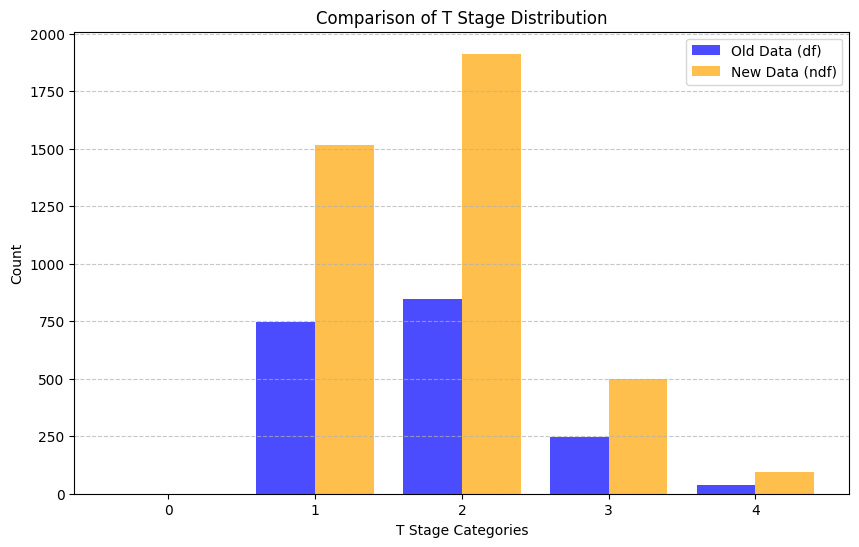

In [263]:
# Distribution in df
t_stage_counts = df['T Stage '].value_counts(dropna=False)
print("Distribution in T Stage (df):")
print(t_stage_counts)

# Distribution in ndf
t_stage_numeric_counts = ndf['T_Stage_'].value_counts()
print("\nDistribution in T_Stage_ (ndf):")
print(t_stage_numeric_counts)

# Example mapping for comparison (assume mapping is known)
mapping = {
    "T1": 1,
    "T2": 2,
    "T3": 3,
    "T4": 4,
    None: 0  # Assuming missing values are encoded as 0 in T_Stage_
}

# Map T Stage from df to numeric for comparison
df_mapped = df['T Stage '].map(mapping).value_counts()
print("\nMapped Distribution of T Stage (df):")
print(df_mapped)

# Compare visually
categories = sorted(mapping.values())  # Sorted numeric categories
df_counts = [df_mapped.get(cat, 0) for cat in categories]
ndf_counts = [t_stage_numeric_counts.get(cat, 0) for cat in categories]

plt.figure(figsize=(10, 6))
x = range(len(categories))
plt.bar(x, df_counts, width=0.4, label="Old Data (df)", color="blue", alpha=0.7, align="center")
plt.bar([i + 0.4 for i in x], ndf_counts, width=0.4, label="New Data (ndf)", color="orange", alpha=0.7, align="center")
plt.title("Comparison of T Stage Distribution")
plt.xlabel("T Stage Categories")
plt.ylabel("Count")
plt.xticks([i + 0.2 for i in x], categories)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### N Stage

In [266]:
df['N Stage'].unique()

array(['N1', 'N2', ' N3 ', ' N1 ', ' n1 ', nan, 'N3', 'n1', ' n3 ', 'n3',
       'n2', ' N2 ', ' n2 '], dtype=object)

In [267]:
ndf['N_Stage'].unique()

array([1, 2, 3])

Distribution in N Stage (df):
N Stage
N1      1275
n1       553
 N1      531
N2       397
NaN      224
 n1      215
N3       198
 N2      161
n2       161
 N3      105
n3        93
 n2       68
 n3       43
Name: count, dtype: int64

Distribution in N_Stage (ndf):
N_Stage
1    2798
2     787
3     439
Name: count, dtype: int64

Mapped Distribution of N Stage (df):
N Stage
1.0    1275
2.0     397
3.0     198
Name: count, dtype: int64


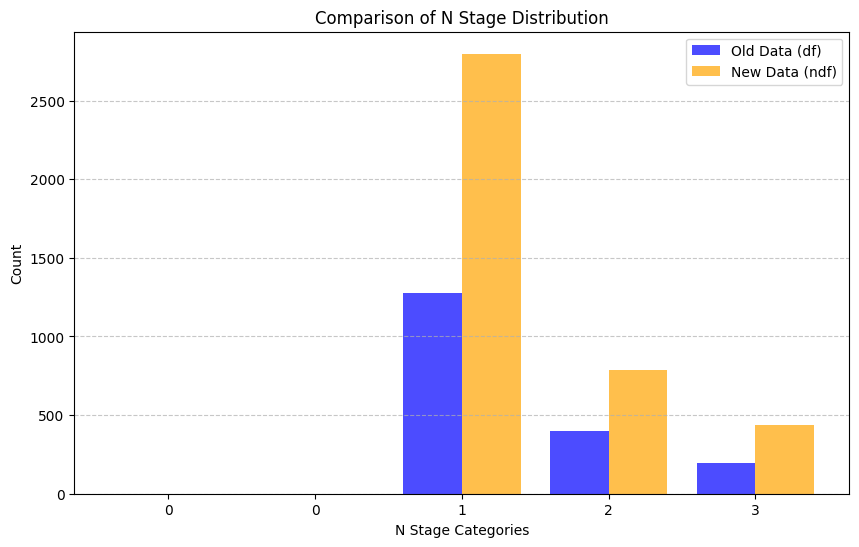

In [268]:
# Distribution in df
n_stage_counts = df['N Stage'].value_counts(dropna=False)
print("Distribution in N Stage (df):")
print(n_stage_counts)

# Distribution in ndf
n_stage_numeric_counts = ndf['N_Stage'].value_counts()
print("\nDistribution in N_Stage (ndf):")
print(n_stage_numeric_counts)

# Example mapping for N Stage to numeric
n_stage_mapping = {
    "N0": 0,
    "N1": 1,
    "N2": 2,
    "N3": 3,
    None: 0  # Assuming missing values are encoded as 0 in N_Stage
}

# Map N Stage from df to numeric for comparison
df_mapped_n_stage = df['N Stage'].map(n_stage_mapping).value_counts()
print("\nMapped Distribution of N Stage (df):")
print(df_mapped_n_stage)

# Compare visually
categories = sorted(n_stage_mapping.values())  # Sorted numeric categories
df_counts_n = [df_mapped_n_stage.get(cat, 0) for cat in categories]
ndf_counts_n = [n_stage_numeric_counts.get(cat, 0) for cat in categories]

plt.figure(figsize=(10, 6))
x = range(len(categories))
plt.bar(x, df_counts_n, width=0.4, label="Old Data (df)", color="blue", alpha=0.7, align="center")
plt.bar([i + 0.4 for i in x], ndf_counts_n, width=0.4, label="New Data (ndf)", color="orange", alpha=0.7, align="center")
plt.title("Comparison of N Stage Distribution")
plt.xlabel("N Stage Categories")
plt.ylabel("Count")
plt.xticks([i + 0.2 for i in x], categories)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
